# MLP on Alternative Data Splitting Method

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.models import load_model

In [4]:
import joblib

Need to preprocess the data again cause not able to open the file 'all_data_final' because of its size

In [4]:
def get_feature_types(df):
    numerical_features = []
    categorical_features = []
    boolean_features = []
    for column_name, column_type in df.dtypes.items():
        if column_type in ['int64', 'float64']:
            numerical_features.append(column_name)
        elif column_type == 'object':
            categorical_features.append(column_name)
        elif column_type == 'bool':
            boolean_features.append(column_name)
    return numerical_features, categorical_features, boolean_features

numerical_features, categorical_features, boolean_features = get_feature_types(data)

def one_hot_encode_features(data, categorical_features):
    if 'label' in categorical_features:
        categorical_features.remove('label')
    if 'subcategory' in categorical_features:
        categorical_features.remove('subcategory')
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
    return data

data = one_hot_encode_features(data, categorical_features)
data.fillna(0, inplace=True)

['PDU Type', 'Info', 'Channel Selection Algorithm', 'Tx Address', 'Rx Address', 'Simultaneous LE and BR/EDR to Same Device Capable (Host)', 'Simultaneous LE and BR/EDR to Same Device Capable (Controller)', 'BR/EDR Not Supported', 'LE General Discoverable Mode', 'LE Limited Discoverable Mode', 'label', 'subcategory', 'Packet Direction']
Total number of rows: 901623
Rows with NaN values:


Split into X=features and y=labels

In [ ]:
X = data.drop(columns=['label', 'subcategory']).values
y = data['label'].values

Save X and y

In [ ]:
joblib.dump(X, 'csv 20 minutes/labeled2/features_final/together/X_MLP.pkl')
joblib.dump(y, 'csv 20 minutes/labeled2/features_final/together/y_MLP.pkl')

Load X and y

In [5]:
X = joblib.load('csv 20 minutes/labeled2/features_final/together/X_MLP.pkl')
y = joblib.load('csv 20 minutes/labeled2/features_final/together/y_MLP.pkl')

# Split data based on the alternative data splitting method

In [39]:
def split_train_test_approach2(data):
    train_data = pd.DataFrame(columns=data.columns)
    test_data = pd.DataFrame(columns=data.columns)
    
    labels = data['label'].unique()
    
    for label in labels:
        label_data = data[data['label'] == label]
        subcategories = label_data['subcategory'].value_counts()
        
        if len(subcategories) == 1:
            train, test = train_test_split(label_data, test_size=0.2, random_state=42)
        else:
            subcategory_to_exclude = subcategories.idxmin()
            remaining_data = label_data[label_data['subcategory'] != subcategory_to_exclude]
            train, test_remain = train_test_split(remaining_data, test_size=0.2, random_state=42)
            test_exclude = label_data[label_data['subcategory'] == subcategory_to_exclude]
            test = pd.concat([test_remain, test_exclude])
        
        train_data = pd.concat([train_data, train])
        test_data = pd.concat([test_data, test])
    
    total_count = len(data)
    train_count = len(train_data)
    test_count = len(test_data)
    print(f"Total data count: {total_count}")
    print(f"Training data count: {train_count} ({(train_count / total_count) * 100:.2f}%)")
    print(f"Testing data count: {test_count} ({(test_count / total_count) * 100:.2f}%)")
    
    for label in labels:
        train_subcategories = train_data[train_data['label'] == label]['subcategory'].unique()
        test_subcategories = test_data[test_data['label'] == label]['subcategory'].unique()
        print(f"Label: {label}")
        print(f"  Training subcategories: {', '.join(train_subcategories)}")
        print(f"  Testing subcategories: {', '.join(test_subcategories)}")
        print()
        
    return train_data, test_data

In [6]:
train_data_approach2, test_data_approach2 = split_train_test_approach2(data)

Total data count: 901623
Training data count: 687463 (76.25%)
Testing data count: 214160 (23.75%)
Label: Laptop
  Training subcategories: Dell Laptop, Hp Laptop
  Testing subcategories: Dell Laptop, Hp Laptop, Apple Laptop

Label: Headphone
  Training subcategories: Apple Headphone, Sony Linkbuds Headphone, Bose-1 Headphone, Sony XM4 Headphone, Sony XM3 Headphone, Samsung Headphone, Bose-2 Headphone
  Testing subcategories: Apple Headphone, Sony XM3 Headphone, Sony XM4 Headphone, Bose-2 Headphone, Sony Linkbuds Headphone, Bose-1 Headphone, Samsung Headphone, Beats Headphone

Label: iPad
  Training subcategories: Apple iPad
  Testing subcategories: Apple iPad

Label: Airtag
  Training subcategories: Apple Airtag
  Testing subcategories: Apple Airtag

Label: TV
  Training subcategories: LG TV
  Testing subcategories: LG TV, Samsung TV

Label: Kitchen
  Training subcategories: Kettle, Airfryer
  Testing subcategories: Kettle, Airfryer, Mixer

Label: Smartwatch
  Training subcategories: Ap

SAVE

In [7]:
train_data_approach2.to_csv('csv 20 minutes/labeled2/features_final/together/train_MLP_data_approach2.csv', index=False)
test_data_approach2.to_csv('csv 20 minutes/labeled2/features_final/together/test_MLP_data_approach2.csv', index=False)

LOAD

In [6]:
train_data_approach2 = pd.read_csv('csv 20 minutes/labeled2/features_final/together/train_MLP_data_approach2.csv', delimiter=';', encoding='ISO-8859-1')
test_data_approach2 = pd.read_csv('csv 20 minutes/labeled2/features_final/together/test_MLP_data_approach2.csv', delimiter=';', encoding='ISO-8859-1')

In [7]:
X_train_dataset = train_data_approach2.drop(columns=['label', 'subcategory']).values
y_train_dataset = train_data_approach2['label'].values

In [8]:
X_test_dataset = test_data_approach2.drop(columns=['label', 'subcategory']).values
y_test_dataset = test_data_approach2['label'].values

preprocessiing according to paper

In [11]:
scaler = StandardScaler()
X_train_dataset_normalized = scaler.fit_transform(X_train_dataset)
X_test_dataset_normalized = scaler.fit_transform(X_test_dataset)
X_train_dataset_normalized = X_train_dataset_normalized.astype(np.float32)
X_test_dataset_normalized = X_test_dataset_normalized.astype(np.float32)
label_encoder = LabelEncoder()
y_train_dataset_encoded = label_encoder.fit_transform(y_train_dataset)
y_test_dataset_encoded = label_encoder.fit_transform(y_test_dataset)
num_classes = len(label_encoder.classes_)
y_train_dataset_categorical = to_categorical(y_train_dataset_encoded, num_classes=num_classes)
y_test_dataset_categorical = to_categorical(y_test_dataset_encoded, num_classes=num_classes)

In [11]:
X_train2 = X_train_dataset_normalized
y_train2 = y_train_dataset_categorical
X_test2 = X_test_dataset_normalized
y_test2 = y_test_dataset_categorical

SAVE

In [14]:
joblib.dump(X_train2, 'csv 20 minutes/labeled2/features_final/together/X_MLP_train2.pkl')
joblib.dump(y_train2, 'csv 20 minutes/labeled2/features_final/together/y_MLP_train2.pkl')
joblib.dump(X_test2, 'csv 20 minutes/labeled2/features_final/together/X_MLP_test2.pkl')
joblib.dump(y_test2, 'csv 20 minutes/labeled2/features_final/together/y_MLP_test2.pkl')

['csv 20 minutes/labeled2/features_final/together/y_MLP_test2.pkl']

LOAD

In [12]:
X_train2 = joblib.load('csv 20 minutes/labeled2/features_final/together/X_MLP_train2.pkl')
X_test2 = joblib.load('csv 20 minutes/labeled2/features_final/together/X_MLP_test2.pkl')
y_train2 = joblib.load('csv 20 minutes/labeled2/features_final/together/y_MLP_train2.pkl')
y_test2 = joblib.load('csv 20 minutes/labeled2/features_final/together/y_MLP_test2.pkl')

# TRAIN MLP

In [15]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dataset_normalized.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 17s 954us/step - accuracy: 0.9789 - loss: 0.1076 - val_accuracy: 0.2445 - val_loss: 60.3486
Epoch 2/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 17s 964us/step - accuracy: 0.9967 - loss: 0.0165 - val_accuracy: 0.2445 - val_loss: 90.1370
Epoch 3/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 16s 946us/step - accuracy: 0.9972 - loss: 0.0140 - val_accuracy: 0.2446 - val_loss: 114.0431
Epoch 4/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 17s 999us/step - accuracy: 0.9975 - loss: 0.0136 - val_accuracy: 0.2445 - val_loss: 175.5731
Epoch 5/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9975 - loss: 0.0136 - val_accuracy: 0.2445 - val_loss: 198.3803
Epoch 6/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9976 - loss: 0.0144 - val_accuracy: 0.2445 - val_loss: 241.8929
Epoch 7/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9975 - loss: 0.0192 - val_accuracy: 0.2445 - val_loss: 250.8859
Epoch 8/50
17187/17187 ━━━━━━━━━━━━━━━━━━━━ 17s 1

In [13]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

Label Mapping:
Airtag: 0
Bathroom: 1
Camera: 2
Headphone: 3
Kitchen: 4
Laptop: 5
Smartphone: 6
Smartwatch: 7
TV: 8
iPad: 9


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          29,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,576 (549.13 KB)

 Trainable params: 46,858 (183.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,718 (366.09 KB)

ACHTUNG SAVE

In [21]:
np.savez('csv 20 minutes/labeled2/features_final/together/train_test_data_MLP2.npz', X_train2=X_train2, X_test2=X_test2, y_train2=y_train2, y_test2=y_test2)

In [22]:
model.save('csv 20 minutes/labeled2/features_final/together/MLP2.h5')

In [23]:
model.save('csv 20 minutes/labeled2/features_final/together/MLP2.keras')

ACHTUNG LOAD

In [14]:
data = np.load('csv 20 minutes/labeled2/features_final/together/train_test_data_MLP2.npz')
X_train2 = data['X_train2']
X_test2 = data['X_test2']
y_train2 = data['y_train2']
y_test2 = data['y_test2']

In [15]:
model = load_model('csv 20 minutes/labeled2/features_final/together/MLP2.keras')

## ACCURACY

In [13]:
y_pred_test = model.predict(X_test2)
y_pred_train = model.predict(X_train2)

# Convert numerical labels back to string labels
y_pred_test_labels = y_pred_test.argmax(axis=1)
y_pred_train_labels = y_pred_train.argmax(axis=1)
y_test_labels = y_test2.argmax(axis=1)
y_train_labels = y_train2.argmax(axis=1)

accuracy_test = accuracy_score(y_test_labels, y_pred_test_labels)
accuracy_train = accuracy_score(y_train_labels, y_pred_train_labels)

print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

6693/6693 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
21484/21484 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step
Test Accuracy: 0.7762233843855062
Training Accuracy: 0.8474434260462017


## ACCURACY OF EACH DEVICE TYPE

In [11]:
y_pred_test = np.argmax(model.predict(X_test2), axis=1)
y_pred_train = np.argmax(model.predict(X_train2), axis=1)
y_test_labels = np.argmax(y_test2, axis=1)
y_train_labels = np.argmax(y_train2, axis=1)

overall_accuracy_test = accuracy_score(y_test_labels, y_pred_test)
overall_accuracy_train = accuracy_score(y_train_labels, y_pred_train)
print("Overall Testing Accuracy:", overall_accuracy_test)
print("Overall Training Accuracy:", overall_accuracy_train)

mapping_dict = {0: 'Airtag',
                1: 'Bathroom',
                2: 'Camera',
                3: 'Headphone',
                4: 'Kitchen',
                5: 'Laptop',
                6: 'Smartphone',
                7: 'Smartwatch', 
                8: 'TV',
                9: 'iPad'
}

unique_labels = np.unique(y_test_labels)
for label in unique_labels:
    mask_test = (y_test_labels == label)
    accuracy_test = accuracy_score(y_test_labels[mask_test], y_pred_test[mask_test])
    device_type = mapping_dict[label] 
    print("Testing Accuracy for", device_type, ":", accuracy_test)

6693/6693 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
21484/21484 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step
Overall Testing Accuracy: 0.7762233843855062
Overall Training Accuracy: 0.8474434260462017
Testing Accuracy for Airtag : 0.9622351857537611
Testing Accuracy for Bathroom : 0.0
Testing Accuracy for Camera : 0.9993396018742727
Testing Accuracy for Headphone : 0.9983765673033747
Testing Accuracy for Kitchen : 0.9860271903323263
Testing Accuracy for Laptop : 0.8282396861554037
Testing Accuracy for Smartphone : 0.8020377989200309
Testing Accuracy for Smartwatch : 0.9956329870368668
Testing Accuracy for TV : 0.3329797711947875
Testing Accuracy for iPad : 0.993217379625277


## PRECISION, RECALL, SPECIFICITY, F1-SCORE

In [51]:
report = classification_report(y_test_labels, y_pred_test_labels, target_names=label_encoder.classes_, output_dict=True)
conf_matrix = confusion_matrix(y_test_labels, y_pred_test_labels)
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}

labels = sorted(set(y_test_labels))
metrics = []

for i, label in enumerate(labels):
    tn = conf_matrix.sum() - (conf_matrix[:, i].sum() + conf_matrix[i, :].sum() - conf_matrix[i, i])
    tp = conf_matrix[i, i]
    fn = conf_matrix[i, :].sum() - tp
    fp = conf_matrix[:, i].sum() - tp

    class_name = label_mapping[label]
    
    precision = report[class_name]['precision']
    recall = report[class_name]['recall']
    f1 = report[class_name]['f1-score']
    specificity = tn / (tn + fp)
    
    metrics.append({
        'label': class_name,
        'precision': precision,
        'recall': recall,
        'specificity': specificity,
        'f1-score': f1,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn
    })
print(pd.DataFrame(metrics))

        label  precision    recall  specificity  f1-score     tp     fp  \
0      Airtag   0.517115  0.997237     0.985619  0.681065   3248   3033   
1    Bathroom   0.000000  0.000000     1.000000  0.000000      0      0   
2      Camera   1.000000  0.999937     1.000000  0.999969  31797      0   
3   Headphone   0.496652  0.999033     0.841730  0.663470  28923  29313   
4     Kitchen   0.949043  0.734989     0.997947  0.828412   7785    418   
5      Laptop   0.999958  0.760757     0.999995  0.864109  24046      1   
6  Smartphone   0.997973  0.569748     0.999803  0.725375  17726     36   
7  Smartwatch   0.610336  0.995633     0.928131  0.756765  21659  13828   
8          TV   0.971116  0.282749     0.999448  0.437977   3732    111   
9        iPad   0.519576  0.994560     0.931279  0.682567  14810  13694   

       tn     fn  
0  207870      9  
1  187163  26997  
2  182361      2  
3  155896     28  
4  203150   2807  
5  182551   7562  
6  183012  13386  
7  178578     95  
8  

## CONFUSION MATRIX

6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 758us/step
21484/21484 ━━━━━━━━━━━━━━━━━━━━ 16s 764us/step


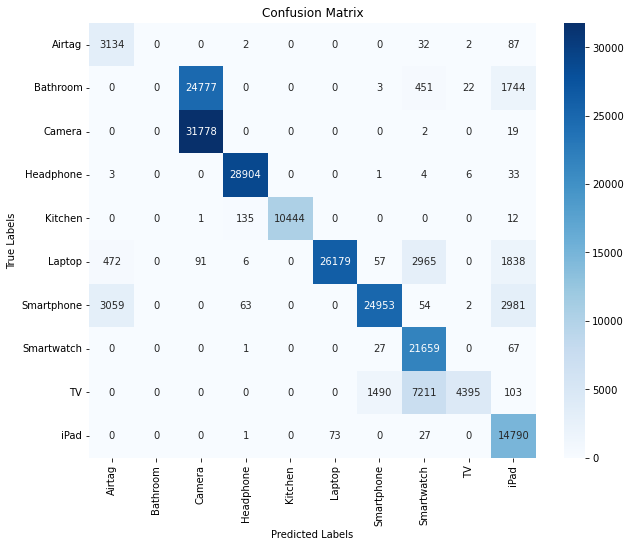

In [37]:
conf_matrix = confusion_matrix(y_test_labels, y_pred_test)
class_names = label_encoder.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
#plt.savefig('Classification/Confusion Matrix MLP2.png', bbox_inches='tight')
plt.show()

## CHECK OVERFITTING

In [30]:
# Comparing training and test accuracies
y_pred_train = np.argmax(model.predict(X_train2), axis=1)
y_pred_test = np.argmax(model.predict(X_test2), axis=1)

train_accuracy = accuracy_score(y_train_labels, y_pred_train)
test_accuracy = accuracy_score(y_test_labels, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

21484/21484 ━━━━━━━━━━━━━━━━━━━━ 12s 560us/step
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 4s 577us/step
Train Accuracy: 0.8474434260462017
Test Accuracy: 0.7762233843855062


# TRAIN MLP ON SELECTED FEATURES

Need to preprocess the data again cause not able to open the file 'all_data_final' because of its size

In [48]:
def get_feature_types(df):
    numerical_features = []
    categorical_features = []
    boolean_features = []
    for column_name, column_type in df.dtypes.items():
        if column_type in ['int64', 'float64']:
            numerical_features.append(column_name)
        elif column_type == 'object':
            categorical_features.append(column_name)
        elif column_type == 'bool':
            boolean_features.append(column_name)
    return numerical_features, categorical_features, boolean_features

numerical_features, categorical_features, boolean_features = get_feature_types(data)

def one_hot_encode_features(data, categorical_features):
    if 'label' in categorical_features:
        categorical_features.remove('label')
    if 'subcategory' in categorical_features:
        categorical_features.remove('subcategory')
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
    return data

data = one_hot_encode_features(data, categorical_features)
data.fillna(0, inplace=True)

['PDU Type', 'Info', 'Channel Selection Algorithm', 'Tx Address', 'Rx Address', 'Simultaneous LE and BR/EDR to Same Device Capable (Host)', 'Simultaneous LE and BR/EDR to Same Device Capable (Controller)', 'BR/EDR Not Supported', 'LE General Discoverable Mode', 'LE Limited Discoverable Mode', 'label', 'subcategory', 'Packet Direction']
Total number of rows: 901623
Rows with NaN values:


Split data based on the alternative data splitting method

In [49]:
train_data_approach2, test_data_approach2 = split_train_test_approach2(data)

Total data count: 901623
Training data count: 687463 (76.25%)
Testing data count: 214160 (23.75%)
Label: Laptop
  Training subcategories: Dell Laptop, Hp Laptop
  Testing subcategories: Dell Laptop, Hp Laptop, Apple Laptop

Label: Headphone
  Training subcategories: Apple Headphone, Sony Linkbuds Headphone, Bose-1 Headphone, Sony XM4 Headphone, Sony XM3 Headphone, Samsung Headphone, Bose-2 Headphone
  Testing subcategories: Apple Headphone, Sony XM3 Headphone, Sony XM4 Headphone, Bose-2 Headphone, Sony Linkbuds Headphone, Bose-1 Headphone, Samsung Headphone, Beats Headphone

Label: iPad
  Training subcategories: Apple iPad
  Testing subcategories: Apple iPad

Label: Airtag
  Training subcategories: Apple Airtag
  Testing subcategories: Apple Airtag

Label: TV
  Training subcategories: LG TV
  Testing subcategories: LG TV, Samsung TV

Label: Kitchen
  Training subcategories: Kettle, Airfryer
  Testing subcategories: Kettle, Airfryer, Mixer

Label: Smartwatch
  Training subcategories: Ap

In [50]:
# selected features from filter selection method
top_features = [
    "Nr Forward Packets 1",
    "Number of Packets 1",
    "Sum Payload Length 1",
    "Sum Packet Length 1", 
    "Sum RSSI 1", 
    "Nr Backward Packets 1",
    "Min Payload Length 1",
    "Min Packet Length 1",
    "Min RSSI 1", 
    "Info_ADV_NONCONN_IND",
    "PDU Type_0x2", 
    "LE Limited Discoverable Mode_True", 
    "BR/EDR Not Supported_True", 
    "Duration 1", 
    "Average RSSI 1",
    "Average Packet Length 1", 
    "Average Payload Length 1",
    "Sum of Delta Time 1",
    "Sum Forward Delta Time 1",
    "LE Bluetooth Device Address",
    "Standard Deviation RSSI 1",
    "Flags",
    "16-bit Service Class UUIDs (incomplete)",
    "Tx Address_Random", 
    "Manufacturer Specific_Length",
    "Power Level (dBm)", 
    "Standard Deviation Payload Length 1", 
    "Standard Deviation Packet Length 1",
    "Average Nr Forward Packet 1",
    "Average Nr Backward Packet 1"
]

y_train_top_dataset = train_data_approach2['label'].values
y_test_top_dataset = test_data_approach2['label'].values
label_encoder = LabelEncoder()
y_train_top_dataset_encoded = label_encoder.fit_transform(y_train_top_dataset)
y_test_top_dataset_encoded = label_encoder.transform(y_test_top_dataset)
num_classes = len(label_encoder.classes_)
y_train_top_dataset_categorical = to_categorical(y_train_top_dataset_encoded, num_classes=num_classes)
y_test_top_dataset_categorical = to_categorical(y_test_top_dataset_encoded, num_classes=num_classes)

best_num_features = 0
highest_accuracy = 0

# Train the MLP model with the first feature and adding in each loop one feature untill all features are included
for i in range(1, len(top_features) + 1):
    selected_features = top_features[:i]
    
    X_train_top_dataset = train_data_approach2[selected_features].values
    X_test_top_dataset = test_data_approach2[selected_features].values
    
    # preprocess according to paper
    scaler = StandardScaler()
    X_train_top_dataset_normalized = scaler.fit_transform(X_train_top_dataset)
    X_test_top_dataset_normalized = scaler.transform(X_test_top_dataset)
    X_train_top_dataset_normalized = X_train_top_dataset_normalized.astype(np.float32)
    X_test_top_dataset_normalized = X_test_top_dataset_normalized.astype(np.float32)
    
    # same model structure as from paper
    model_top = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_top_dataset_normalized.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    model_top.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model_top.fit(X_train_top_dataset_normalized, y_train_top_dataset_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    y_pred_test = model_top.predict(X_test_top_dataset_normalized)
    y_pred_test_labels = y_pred_test.argmax(axis=1)
    y_test_labels = y_test_top_dataset_categorical.argmax(axis=1)
    accuracy_test = accuracy_score(y_test_labels, y_pred_test_labels)
    
    if accuracy_test > highest_accuracy:
        highest_accuracy = accuracy_test
        best_num_features = i

    print(f"Number of features: {i}, Test accuracy: {accuracy_test}")

# The best number of features with the highest accuracy
print(f"Best number of features: {best_num_features} with highest accuracy: {highest_accuracy}")

6693/6693 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Number of features: 1, Test accuracy: 0.5256163615988046
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 800us/step
Number of features: 2, Test accuracy: 0.5895125140082181
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 719us/step
Number of features: 3, Test accuracy: 0.6382844602166604
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 715us/step
Number of features: 4, Test accuracy: 0.6549589092267464
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 764us/step
Number of features: 5, Test accuracy: 0.7279463952185282
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 689us/step
Number of features: 6, Test accuracy: 0.71036141202839
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 685us/step
Number of features: 7, Test accuracy: 0.7038569293985805
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 680us/step
Number of features: 8, Test accuracy: 0.7001587598057527
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 695us/step
Number of features: 9, Test accuracy: 0.7261813597310423
6693/6693 ━━━━━━━━━━━━━━━━━━━━ 5s 708us/step
Number of features: 10, Test accuracy: 0.

In [52]:
# Get the training accuracy of the MLP model trained on 27 features
selected_features = top_features[:27]
X_train_top27 = train_data_approach2[selected_features].values

# proprocess accroding to paper
scaler = StandardScaler()
X_train_top27_normalized = scaler.fit_transform(X_train_top27)
X_train_top27_normalized = X_train_top27_normalized.astype(np.float32)

# Train the MLP model
model_top27 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_top27_normalized.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_top27.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_top27.fit(X_train_top27_normalized, y_train_top_dataset_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_pred_train = model_top27.predict(X_train_top27_normalized)
y_pred_train_labels = y_pred_train.argmax(axis=1)
y_train_labels = y_train_top_dataset_categorical.argmax(axis=1)
accuracy_train = accuracy_score(y_train_labels, y_pred_train_labels)

print(f"Training accuracy with top 27 features: {accuracy_train}")

21484/21484 ━━━━━━━━━━━━━━━━━━━━ 18s 850us/step
Training accuracy with top 27 features: 0.8476252540136705
